<h1>Embedded AI Project</h1>
<h2>Wine Quality Prediction</h2>
<p>We will use a wine quality prediction model in our embedded AI project. This model is based on 12 features described in a csv file.
So first we will have to analyze the data used by the model.</p>  

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import random as rd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [22]:
path = "Dataset/winequalityN.csv"
df = pd.read_csv(path)
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [23]:
df['type'].value_counts()

type
white    4898
red      1599
Name: count, dtype: int64

We can see that we have 2 types white wine and red wine. Lets change the types from text to numbers for our training model:
<ul>
    <li>white => 1</li>
    <li>red => 2</li>
</ul>

In [24]:
df["type"] = df["type"].replace(["white", "red"], [1, 0])
df['type'].value_counts()

type
1    4898
0    1599
Name: count, dtype: int64

In [25]:
df['quality'].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

we can see that we have 7 different types, unfortunetly the repartition is not homogenious

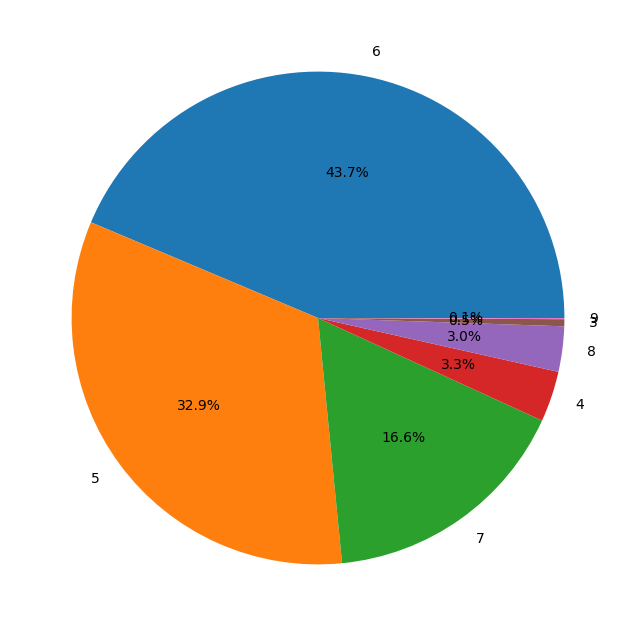

In [26]:
y = df['quality'].value_counts().tolist()
x = [6, 5, 7, 4, 8, 3, 9]

plt.figure(figsize=(8,8))
patches, texts, autotexts = plt.pie(y, labels=x, autopct='%1.1f%%',)

quality has more than 40% of the data

From the table above we can see that some features do not have a value for some samples

In [27]:
 df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

7 features doesnt have a value for some samples. That can be a problem !
in order to solve that lets fill the empty values with the mean of the feature to not lose the statistic accuracy

In [28]:
df = df.fillna(df.mean())
df.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Lets analyze the full data now

<bound method IndexOpsMixin.value_counts of 0       7.0
1       6.3
2       8.1
3       7.2
4       7.2
       ... 
6492    6.2
6493    5.9
6494    6.3
6495    5.9
6496    6.0
Name: fixed acidity, Length: 6497, dtype: float64>


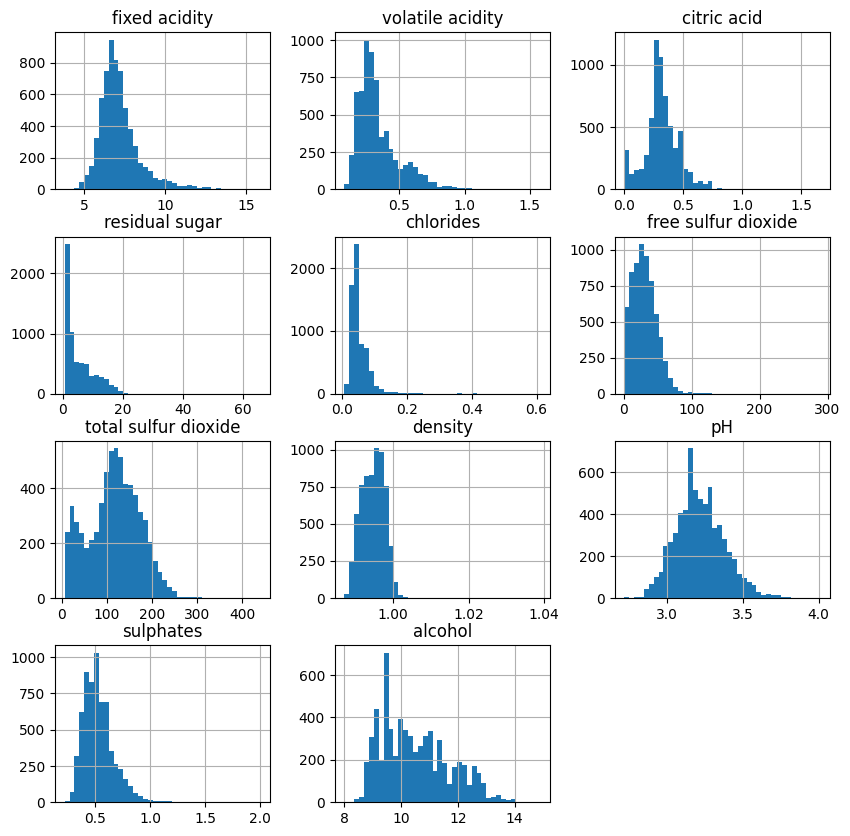

In [29]:
features = df.columns.tolist()
df[features[1:-1]].hist(bins = 40, figsize = (10, 10))
print(df['fixed acidity'].value_counts)

we can see that the data is well distributed for some features, but not the case for others like <b>chlorides</b>, <b>free sulfur dioxide</b> or <b>residual sugar</b>

Lets Run a correlation analysis to study the data more

In [30]:
corr = df.corr()
corr.style.background_gradient(cmap='plasma')

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
type,1.000000,-0.486913,-0.652606,0.187073,0.348982,-0.512596,0.471644,0.700357,-0.390645,-0.328514,-0.486662,0.032970,0.119323
fixed acidity,-0.486913,1.000000,0.219918,0.323349,-0.112219,0.298282,-0.283237,-0.329409,0.458941,-0.251683,0.300225,-0.095560,-0.076967
volatile acidity,-0.652606,0.219918,1.000000,-0.377759,-0.196578,0.377122,-0.353055,-0.414706,0.271107,0.260283,0.225313,-0.038215,-0.265838
citric acid,0.187073,0.323349,-0.377759,1.000000,0.142451,0.039310,0.133426,0.195148,0.096307,-0.328354,0.057564,-0.010431,0.085699
residual sugar,0.348982,-0.112219,-0.196578,0.142451,1.000000,-0.128887,0.403242,0.495704,0.552487,-0.266717,-0.185716,-0.359656,-0.036819
chlorides,-0.512596,0.298282,0.377122,0.039310,-0.128887,1.000000,-0.194978,-0.279547,0.362580,0.044754,0.395073,-0.256844,-0.200818
free sulfur dioxide,0.471644,-0.283237,-0.353055,0.133426,0.403242,-0.194978,1.000000,0.720934,0.025717,-0.145116,-0.188471,-0.179838,0.055463
total sulfur dioxide,0.700357,-0.329409,-0.414706,0.195148,0.495704,-0.279547,0.720934,1.000000,0.032395,-0.237523,-0.275291,-0.265740,-0.041385
density,-0.390645,0.458941,0.271107,0.096307,0.552487,0.362580,0.025717,0.032395,1.000000,0.011913,0.259432,-0.686745,-0.305858
pH,-0.328514,-0.251683,0.260283,-0.328354,-0.266717,0.044754,-0.145116,-0.237523,0.011913,1.000000,0.191075,0.120939,0.019356


We can see that there ar a lot of correlations here meaning that training the data can be challenging due to a lack of independency. We can also notice that there is a strong correlation between the <b>quality</b> and <b>alcohool</b> compared to the other featurs, meaning that quality is strongly related to the degree of alcohool

Judging by the correlations, we can try a PCA analysis and maybe elaborate a classification model ! Unfortunately we are binded to use CNN for this lab so we will proceed withe a CNN model. 

Before doing anything further, we can see that the data intervals for the features are too different, this could lead to a problem in our model because it could biased with a feature having a larger value than the others.
To prevent that we will scale the data so that all the features will be in the same interval between 0 and 1

In [31]:
def scale_data(df):
    scaled_df = pd.DataFrame()
    last_column = df.columns[-1]  # get the last column (quality) of data
    for column in df.columns:
        if column != last_column:
            min_val = df[column].min()
            max_val = df[column].max()
            scaled_column = (df[column] - min_val) / (max_val - min_val)
            scaled_df[column] = scaled_column
        else:
            scaled_df[column] = df[column] # keep the last column unchanged
    return scaled_df

scaled_data =scale_data(df)

First lets create out train and test sets

In [32]:
# we will take 80% of the data for training our model, 10% for validating the model, and 10% to test it
train_percentage = 0.5
validation_percentage = 0.25
# get the features label/keys
features = df.columns.tolist()
# remove the quality feature
features = features[:len(features)-1]
# set the data to an array of values of each features
X = scaled_data[features].values

# set the label to the quality feature
y = scaled_data["quality"].values
# the CNN model will look for labels from 0 to 7, or we have labels from 3 to 9 so lets rescale the labels by removing 3 from them
y=y-3
print(y)

'''
# now lets map the training samples to their label and convert that to a list
data = zip(X,y)
data = list(data)
rd.shuffle(data) # shuffle data to create the randomness for train set and test set
# lets extract the samples values and labels from the shuffeled data
data = tuple(data)
X,y = zip(*data)
'''


[3 3 3 ... 3 2 3]


'\n# now lets map the training samples to their label and convert that to a list\ndata = zip(X,y)\ndata = list(data)\nrd.shuffle(data) # shuffle data to create the randomness for train set and test set\n# lets extract the samples values and labels from the shuffeled data\ndata = tuple(data)\nX,y = zip(*data)\n'

our data is not balanced, so we will use SMOTE algorythm to balance the data. This algorythm uses the k nearest numbers of a sample to generate a new sample that fits the class/cluster perfectly thus not changing the decision surface as shown in the image bellow:
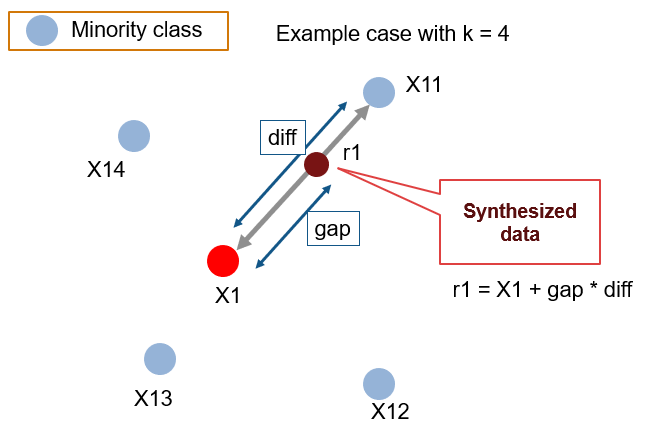

In [33]:
from imblearn.over_sampling import SMOTE
print("count before over sampling")

# the class labels we have
y_set = [0,1,2,3,4,5,6]
y_count = list(y)

# printing number of samples per class before implementing the SMOTE
for i in range(len(y_set)):
    print("{} = {}".format(y_set[i],y_count.count(y_set[i])))

# SMOTE implementation using 4 nearest neibors
oversampler = SMOTE(k_neighbors=4, random_state=42)
X, y = oversampler.fit_resample(X, y)

# printing number of samples per class before implementing the SMOTE
y_count = list(y)
print("count after over sampling")
for i in range(len(y_set)):
    print("{} = {}".format(y_set[i],y_count.count(y_set[i])))

count before over sampling
0 = 30
1 = 216
2 = 2138
3 = 2836
4 = 1079
5 = 193
6 = 5
count after over sampling
0 = 2836
1 = 2836
2 = 2836
3 = 2836
4 = 2836
5 = 2836
6 = 2836


Due to the disposition of the data after the augmentation, our model overfitted a lot, to solve that we shuffelled the data to have a data between all the sets

In [34]:
# mapping and compressing the data 
data = zip(X,y)
data = list(data)
rd.shuffle(data) # shuffle data to create the randomness for train set and test set
data = tuple(data)
# extracting the samples from the data object
X,y = zip(*data)

# extracting the training, test, and validation sets from the samples
num_data = len(X)
num_train = int(num_data * train_percentage)
num_validation = int(num_data * validation_percentage)


X_train = np.array(X[:num_train])
y_train = np.array(y[:num_train])
X_val = np.array(X[num_train:num_train+num_validation])
y_val = np.array(y[num_train:num_train+num_validation])
X_test = np.array(X[num_train+num_validation:])
y_test = np.array(y[num_train+num_validation:])

print(X_test.shape)
print(X_val.shape)
print(X_train.shape)

(4963, 12)
(4963, 12)
(9926, 12)


[0, 1, 2, 3, 4, 5, 6]
[2836, 2836, 2836, 2836, 2836, 2836, 2836]


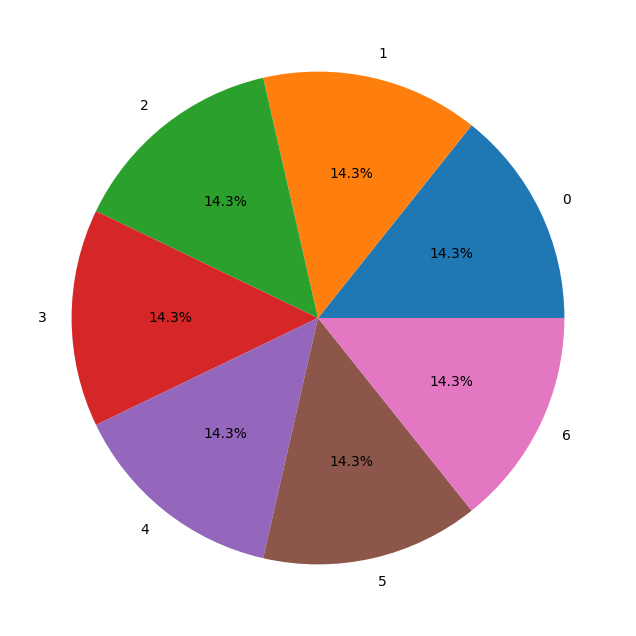

In [35]:
# lets plot the data to see the difference
y_count = []
print(y_set)
for i in range(len(y_set)):
    y_count.append(y.count(y_set[i]))
print(y_count)
plt.figure(figsize=(8,8))
patches, texts, autotexts = plt.pie(y_count, labels=y_set, autopct='%1.1f%%',)

Our data set is now balanced and ready to be used ow let's create our CNN model:

In [36]:
# we first import the libraries we need
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten,Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Activation
from tensorflow.keras import layers
from tensorflow.keras import regularizers

# we check the shape of the training data
print(X_train.shape)
shape = (X_train.shape[1],)
# we have 7 quality value so 7 outputs
output = 7
model = Sequential()
# we will use tanh as our activation function to have a smoother border decision and a less linear propagation
model.add(Dense(120,input_shape = shape, activation = 'tanh'))
model.add(Dense(60, activation = 'tanh'))
model.add(Dense(30, kernel_regularizer=regularizers.L2(1e-2), activity_regularizer=regularizers.L2(1e-3), activation = 'relu'))
# we added some noise to prevent overfitting
model.add(Dropout(0.3))
model.add(Dense(output, activation='softmax'))
model.summary()
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 1000)
model.evaluate(X_test, y_test)


(9926, 12)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 120)               1560      
                                                                 
 dense_5 (Dense)             (None, 60)                7260      
                                                                 
 dense_6 (Dense)             (None, 30)                1830      
                                                                 
 dropout_1 (Dropout)         (None, 30)                0         
                                                                 
 dense_7 (Dense)             (None, 7)                 217       
                                                                 
Total params: 10867 (42.45 KB)
Trainable params: 10867 (42.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1

[0.7024280428886414, 0.7529720067977905]

We have a working model with an acceptable accuracy of 78.4% , now let's extract it to use in our STM32

In [37]:
np.save("WINE_QUALITY_X_TEST.npy", X_test)
np.save("WINE_QUALITY_Y_TEST.npy", y_test)
model.save("wine_quality.h5")
model.save("wine_quality.keras")

/home/haitam/Documents/embedded_ai/venv/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<h1>Adversarial attacks</h1>

Lets create the function to create the adversarial patterns

In [52]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()

def create_adversarial_pattern(input_feature, input_label):
  with tf.GradientTape() as tape:
    tape.watch(input_feature)
    prediction = model(input_feature)
    loss = loss_object(input_label, prediction)

  # Get the gradients of the loss w.r.t to the input image.
  gradient = tape.gradient(loss, input_feature)
  # Get the sign of the gradients to create the perturbation
  signed_grad = tf.sign(gradient)
  return signed_grad

In [58]:
# Create the adversarial perturbation for the sample and Get the input label of the sample.

perturbations = create_adversarial_pattern(tf.convert_to_tensor((X_test[0],)), y_test[0])
print(perturbations)
print(y_test[0])

tf.Tensor([[-1. -1.  1. -1. -1.  1. -1.  1.  1. -1.  1.  1.]], shape=(1, 12), dtype=float64)
5


In [65]:
# Create the adversarial samples from the perturbations

epsilons = [0, 0.01, 0.1, 0.15]

for i, eps in enumerate(epsilons):
    print("===================================\n")
    print("For Epsilone {:0.3f} :\n".format(eps))
    adv_x = X_test[0] + eps*perturbations
    adv_x = tf.clip_by_value(adv_x, -1, 1)
    predictions = model(adv_x)
    print("The sample's value : \n")
    print("The sample's real label :\n")
    print(y_test[0])
    print(adv_x)
    print("The predictions are \n")
    for j in range(len(predictions[0])):
        print("Label : {}, percentage : {} \n".format(j,predictions[0][j]))
    



For Epsilone 0.000 :

The sample's value : 

The sample's real label :

5
tf.Tensor(
[[1.         0.23449685 0.09833501 0.17093449 0.1420735  0.06125185
  0.15364846 0.26555706 0.1325958  0.41958438 0.18397886 0.48006334]], shape=(1, 12), dtype=float64)
The predictions are 

Label : 0, percentage : 2.502815663052438e-12 

Label : 1, percentage : 2.029932222313846e-09 

Label : 2, percentage : 0.00035213635419495404 

Label : 3, percentage : 0.018695170059800148 

Label : 4, percentage : 0.15466466546058655 

Label : 5, percentage : 0.8262879848480225 

Label : 6, percentage : 3.781161148075363e-12 


For Epsilone 0.010 :

The sample's value : 

The sample's real label :

5
tf.Tensor(
[[0.99       0.22449685 0.10833501 0.16093449 0.1320735  0.07125185
  0.14364846 0.27555706 0.1425958  0.40958438 0.19397886 0.49006334]], shape=(1, 12), dtype=float64)
The predictions are 

Label : 0, percentage : 2.641263076308409e-12 

Label : 1, percentage : 1.2430057267920347e-06 

Label : 2, percent

We can see that for <b>epsilon = 0</b>, the presidction is quite accurate, but as soon as <b>epsilon >= 0.01</b>, we can see that the prediction lost all accuracy